In [58]:
from sklearn.datasets import make_blobs
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

In [59]:
sns.color_palette("rocket", as_cmap=True)
sns.set_style("darkgrid")

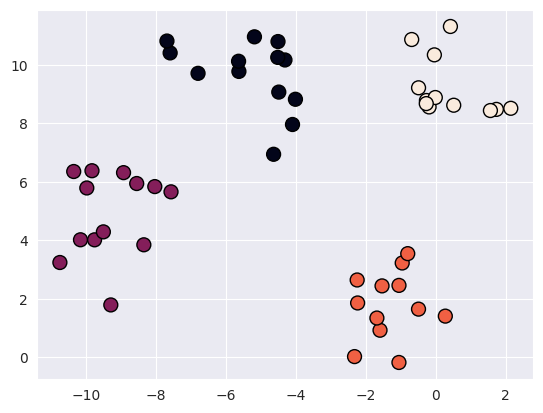

In [60]:
n_cluster = 4
X, y = make_blobs(n_samples=50, centers= n_cluster, n_features=2)
plt.scatter(x= X[:,0], y = X[:,1] , c = y, s=100 , edgecolors = 'black') 
plt.show()

In [61]:
class Point():
    def __init__(self,x,y,label) :
        self.x = x
        self.y = y
        self.label = label

    def dist(self,other):
        distance = math.sqrt( (other.x - self.x)**2  +  (other.y - self.y)**2  )
        return distance

    def __repr__(self) -> str:
        return " x value {} , y value {}".format(self.x,self.y)

    def __add__(self,other):
        return Point(self.x+other.x,self.y+other.y,self.label)

    def __truediv__(self,scalar):
        return Point(self.x/scalar,self.y/scalar,self.label)

In [62]:
def plot(points):
    x = []
    y = []
    c = []
    for i in points :
        x.append(i.x)
        y.append(i.y)
        c.append(i.label)
    plt.scatter(x,y,c=c , s=50 , edgecolors = 'black')
    plt.show()

In [63]:
def plot_with_centroid(points,centroids):
    x = [ point.x for point in points]
    y = [point.y for point in points]
    c = [point.label for point in points]
    plt.scatter(x,y,c=c, s=50 , edgecolors = 'black' )

    centroid_x = [ point.x for point in centroids]
    centroid_y = [ point.y for point in centroids]
    centroid_label = [ point.label for point in centroids]
    plt.scatter(centroid_x,centroid_y,c= centroid_label , marker= "*" , alpha= 0.8, s=150 , edgecolors = 'black')
    plt.show()

In [64]:
points = []
for x in X:
    points.append(Point(x[0],x[1],label=0))

In [65]:
def random_centroid(points,n_cluster):
    random_numbers = random.sample(range(len(points)-1), n_cluster)
    centroids = []
    for i in range(0, n_cluster):
        centroid = points[random_numbers[i]]
        print(centroid)
        centroids.append(Point(centroid.x,centroid.y,i))
    return centroids

In [66]:
def update_labels(points, centroids):
  for point in points:
    min_dist = float('inf')
    min_index = -1
    for i, centroid in enumerate(centroids):
      dist = point.dist(centroid)
      if dist < min_dist:
        min_dist = dist
        min_index = i
    point.label = centroids[min_index].label

In [67]:
def update_centroid(points,centroids) :
    sum = []
    count = []
    for i in range(0,len(centroids)):
        sum.append(Point(0,0,i))
        count.append(0)
 
    for point in points:
        for i,centroid in enumerate(centroids,0):
            if point.label == centroid.label:
                sum[i] = sum[i] + point
                count[i] = count[i] + 1
    print(count)
    for i in range(0,len(centroids)):
        centroids[i] = sum[i]/count[i]
 
    return centroids

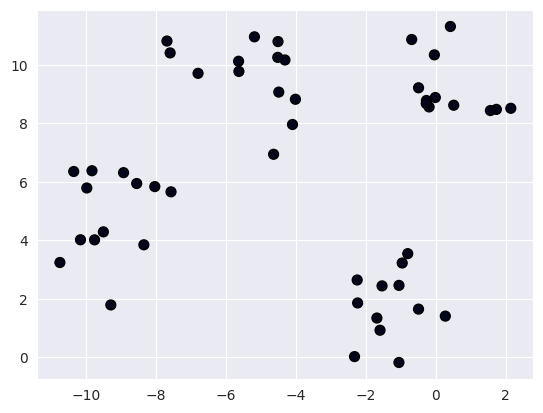

In [68]:
plot(points)

ITERATION 1

 x value -0.015369948796335436 , y value 8.88077740151849
 x value -2.2500482073345403 , y value 2.647470378203511
 x value -9.982000136401926 , y value 5.790430162315449
 x value 1.7311188041113506 , y value 8.475073148618954


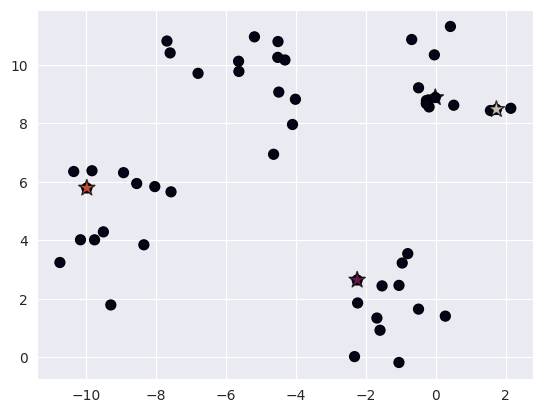

In [69]:
centroids = random_centroid(points , n_cluster)
plot_with_centroid(points,centroids)

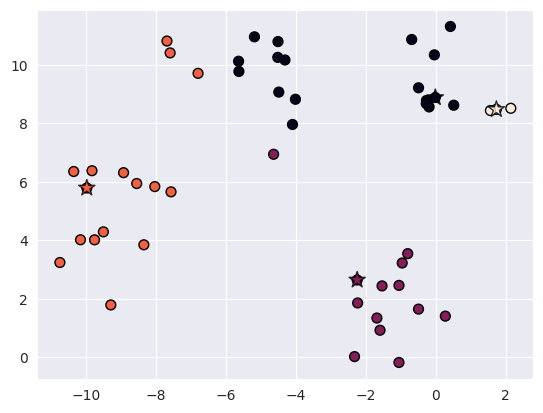

In [70]:

update_labels(points,centroids)
plot_with_centroid(points,centroids)

ITERATION 2

[18, 13, 16, 3]


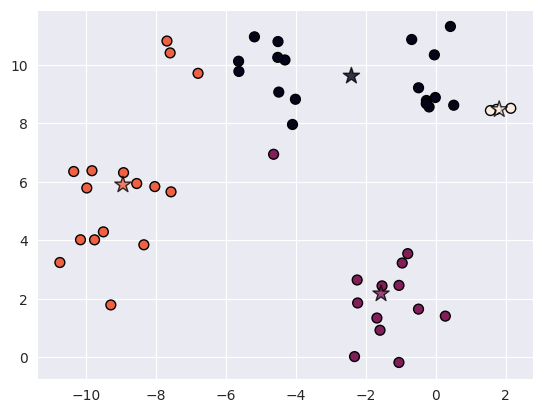

In [71]:
# iteration 2
centroids = update_centroid(points , centroids)
plot_with_centroid(points,centroids)

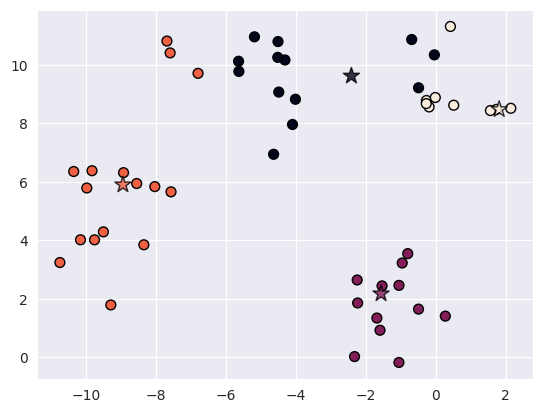

In [72]:
update_labels(points,centroids)
plot_with_centroid(points,centroids)

ITERATION 3

[13, 12, 16, 9]


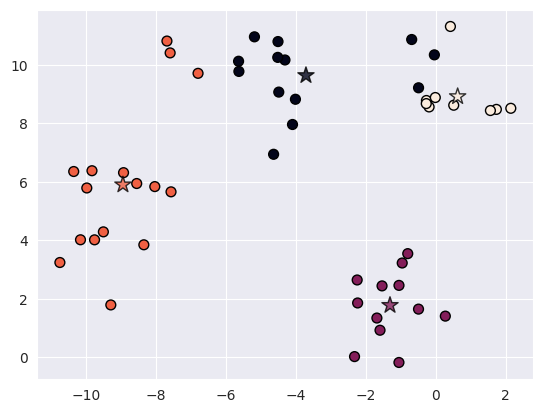

In [73]:
centroids = update_centroid(points , centroids)
plot_with_centroid(points,centroids)

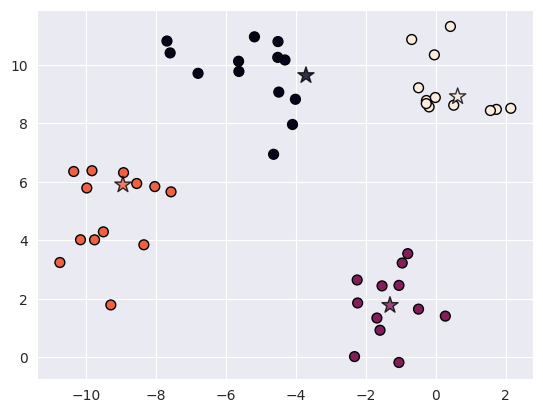

In [74]:
update_labels(points,centroids)
plot_with_centroid(points,centroids)

ITERATION 4

[13, 12, 13, 12]


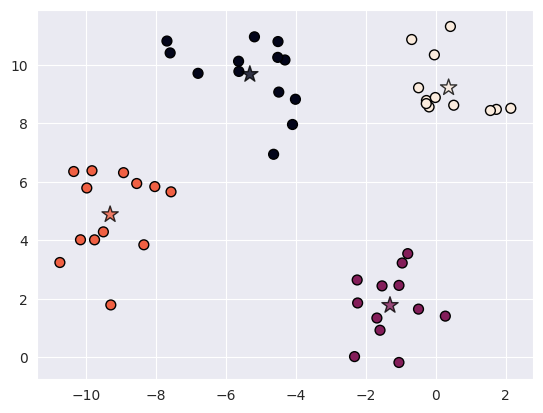

In [75]:
# iteration 2
centroids = update_centroid(points , centroids)
plot_with_centroid(points,centroids)

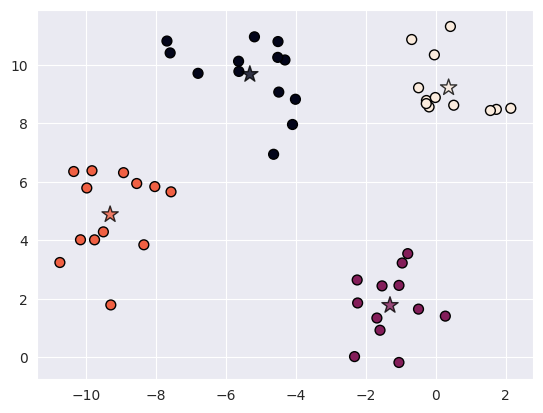

In [76]:
update_labels(points,centroids)
plot_with_centroid(points,centroids)